## Accidentes de Tránsito Terrestre en Zonas Urbanas y Suburbanas (ATUS) - Republica Mexicana durante 2023
### Información proporcionada por el INEGI

### Carga de librerias

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar los archivos CSV en DataFrames separados
df_2023 = pd.read_csv('C:/Users/rodri/OneDrive/Documents/CODER/DATA SCIENCE/E1/atus_anual_csv/conjunto_de_datos/atus_anual_2023.csv')
df_2022 = pd.read_csv('C:/Users/rodri/OneDrive/Documents/CODER/DATA SCIENCE/E1/atus_anual_csv/conjunto_de_datos/atus_anual_2022.csv')

# Unir los DataFrames en uno solo
df= pd.concat([df_2023, df_2022], ignore_index=True)

# Exploración inicial del dataset
df

,COBERTURA,ID_ENTIDAD,ID_MUNICIPIO,ANIO,MES,ID_HORA,ID_MINUTO,ID_DIA,DIASEMANA,URBANA,...,PEATMUERTO,PEATHERIDO,CICLMUERTO,CICLHERIDO,OTROMUERTO,OTROHERIDO,NEMUERTO,NEHERIDO,CLASACC,ESTATUS
0,Municipal,1,1,2023,1,0,0,1,Domingo,Sin accidente en esta zona,...,0,0,0,0,0,0,0,0,No fatal,Cifras Definitivas
1,Municipal,1,1,2023,1,0,0,1,Domingo,Accidente en intersección,...,0,0,0,0,0,0,0,0,No fatal,Cifras Definitivas
2,Municipal,1,1,2023,1,2,20,1,Domingo,Accidente en intersección,...,0,0,0,0,0,0,0,0,Sólo daños,Cifras Definitivas
3,Municipal,1,1,2023,1,3,20,1,Domingo,Accidente en intersección,...,0,0,0,0,0,0,0,0,Fatal,Cifras Definitivas
4,Municipal,1,1,2023,1,6,0,1,Domingo,Accidente en intersección,...,0,0,0,0,0,0,0,0,Sólo daños,Cifras Definitivas
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
789333,Municipal,32,56,2022,12,7,45,30,Viernes,Accidente en intersección,...,0,0,0,0,0,0,0,0,No fatal,Cifras Definitivas
789334,Municipal,32,56,2022,12,8,0,30,Viernes,Accidente en intersección,...,0,0,0,0,0,0,0,0,Sólo daños,Cifras Definitivas
789335,Municipal,32,56,2022,12,17,20,30,Viernes,Accidente en intersección,...,0,0,0,0,0,0,0,0,Sólo daños,Cifras Definitivas
789336,Municipal,32,56,2022,12,14,45,31,Sabado,Accidente en intersección,...,0,0,0,0,0,0,0,0,Sólo daños,Cifras Definitivas


# Gráficos con Matplotlib


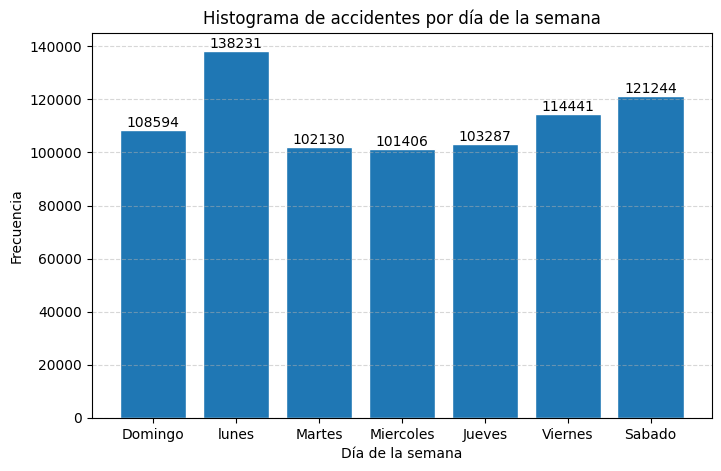

In [3]:

# Filtrar el DataFrame para excluir la categoría '99'
df_f = df[df['DIASEMANA'] != 'No especificado']

# Gráfico 1: Histograma
plt.figure(figsize=(8, 5))
n, bins, patches = plt.hist(df_f['DIASEMANA'], bins=range(8), edgecolor='w', align='left', rwidth=0.8)
plt.title('Histograma de accidentes por día de la semana')
plt.xlabel('Día de la semana')
plt.ylabel('Frecuencia')
plt.grid(True, axis='y', linestyle='--', alpha=0.5)

for patch in patches:
    height = patch.get_height()
    plt.text(patch.get_x() + patch.get_width() / 2,
             height + 0.1,  # Desplazar un poco hacia arriba
             f'{int(height)}',
             ha='center', va='bottom')
    
plt.show()


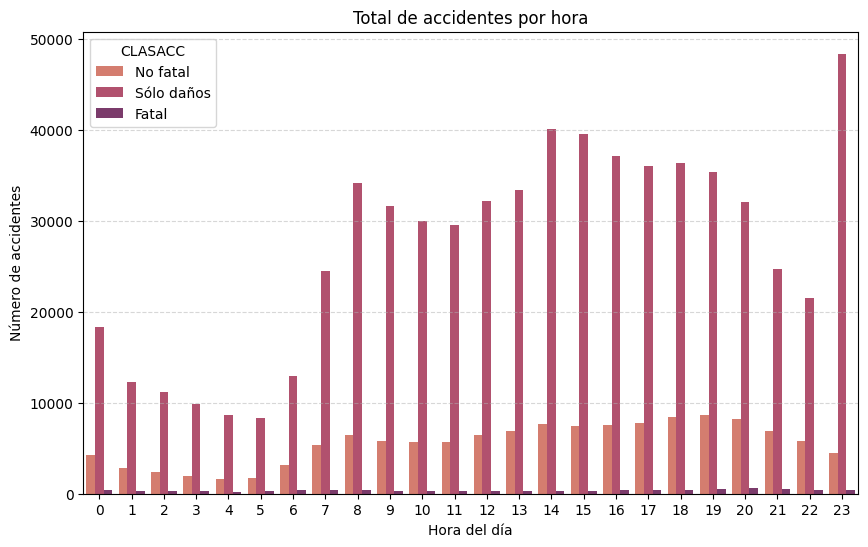

In [4]:
df_f2 = df[df['ID_HORA'] != 99]

plt.figure(figsize=(10, 6))
et=sns.countplot(data=df_f2, x='ID_HORA', hue='CLASACC', palette='flare')
plt.title('Total de accidentes por hora')
plt.xlabel('Hora del día')
plt.ylabel('Número de accidentes')
plt.grid(True, axis='y', linestyle='--', alpha=0.5)

   
plt.show()


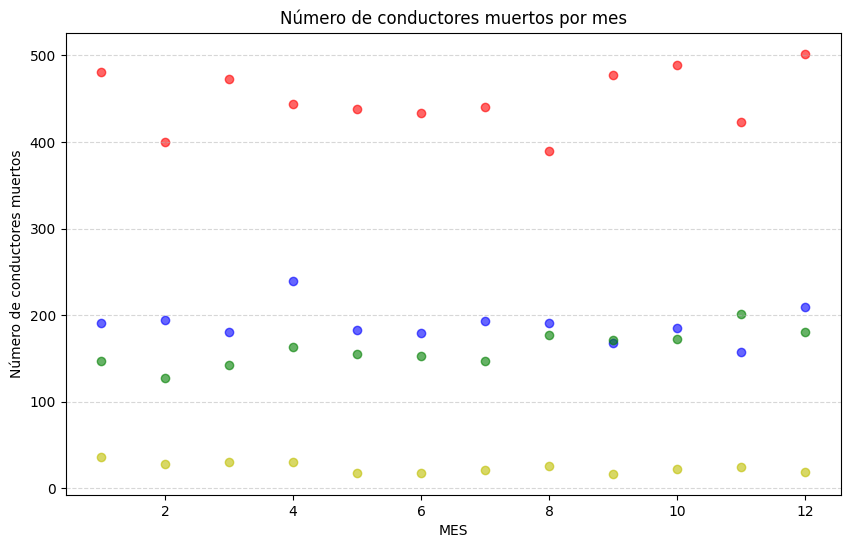

In [5]:
df_f3 = df.groupby('MES')['CONDMUERTO'].sum().reset_index()
df_f4 = df.groupby('MES')['PASAMUERTO'].sum().reset_index()
df_f5 = df.groupby('MES')['PEATMUERTO'].sum().reset_index()
df_f6 = df.groupby('MES')['CICLMUERTO'].sum().reset_index()

plt.figure(figsize=(10, 6))
plt.scatter(df_f3['MES'], df_f3['CONDMUERTO'], color='r', alpha=0.6)
plt.scatter(df_f4['MES'], df_f4['PASAMUERTO'], color='b', alpha=0.6)
plt.scatter(df_f5['MES'], df_f5['PEATMUERTO'], color='g', alpha=0.6)
plt.scatter(df_f6['MES'], df_f6['CICLMUERTO'], color='y', alpha=0.6)

# Etiquetas y título
plt.xlabel('MES')
plt.ylabel('Número de conductores muertos')
plt.title('Número de conductores muertos por mes')

plt.grid(True, axis='y', linestyle='--', alpha=0.5)
